In [1]:
from datetime import datetime

now = datetime.now()
print(now)

2023-10-18 20:00:57.298943


In [2]:
specific_datetime = datetime(2019, 11, 28)
print(specific_datetime)

2019-11-28 00:00:00


In [3]:
date_string = "16 February in 2002"
datetime.strptime(date_string, "%d %B in %Y")

datetime.datetime(2002, 2, 16, 0, 0)

In [4]:
from dateutil.parser import parse

date_string = "03 Feb 02"
print(parse(date_string))
date_string = "3rd February 2002"
print(parse(date_string))

2002-02-03 00:00:00
2002-02-03 00:00:00


In [5]:
time_diff = now - datetime(year=2020, month=1, day=1)
print(time_diff)

1386 days, 20:00:57.298943


# Vectorised Datetimes

In [6]:
import numpy as np

date = np.array("2020-01-01", dtype=np.datetime64)
date

array('2020-01-01', dtype='datetime64[D]')

In [7]:
date + range(32)

array(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
       '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01'],
      dtype='datetime64[D]')

In [8]:
np.datetime64("2020-01-01 09:00")

numpy.datetime64('2020-01-01T09:00')

In [9]:
import pandas as pd

date = pd.to_datetime("16th of February, 2020")
date

Timestamp('2020-02-16 00:00:00')

In [10]:
date + pd.to_timedelta(np.arange(12), "D")

DatetimeIndex(['2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27'],
              dtype='datetime64[ns]', freq=None)

In [11]:
pd.date_range(start="2018/1/1", end="2018/1/8")

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [12]:
pd.date_range("2018-01-01", periods=3, freq="H")

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [13]:
dti = pd.date_range("2018-01-01", periods=3, freq="H").tz_localize("UTC")
dti.tz_convert("US/Pacific")

DatetimeIndex(['2017-12-31 16:00:00-08:00', '2017-12-31 17:00:00-08:00',
               '2017-12-31 18:00:00-08:00'],
              dtype='datetime64[ns, US/Pacific]', freq='H')

# 非时间类型转换到时间类型

In [14]:
import requests

url = "https://api.ons.gov.uk/timeseries/JP9P/dataset/UNEM/data"

# Get the data from the ONS API:
df = pd.DataFrame(pd.json_normalize(requests.get(url).json()["months"]))
df["value"] = pd.to_numeric(df["value"])
df = df[["date", "value"]]
df = df.rename(columns={"value": "Vacancies (ICT), thousands"})
df.head()

,date,"Vacancies (ICT), thousands"
0,2001 MAY,50
1,2001 JUN,48
2,2001 JUL,47
3,2001 AUG,46
4,2001 SEP,44


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date                        267 non-null    object
 1   Vacancies (ICT), thousands  267 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.3+ KB


In [16]:
df["date"] = pd.to_datetime(df["date"])
df["date"].head()

C:\Users\ping\AppData\Local\Temp\ipykernel_32000\4101568055.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


0   2001-05-01
1   2001-06-01
2   2001-07-01
3   2001-08-01
4   2001-09-01
Name: date, dtype: datetime64[ns]

In [17]:
small_df = pd.DataFrame({"date": ["1, '19, 22", "1, '19, 23"], "values": ["1", "2"]})
small_df["date"]

0    1, '19, 22
1    1, '19, 23
Name: date, dtype: object

In [18]:
pd.to_datetime(small_df["date"], format="%m, '%y, %d")

0   2019-01-22
1   2019-01-23
Name: date, dtype: datetime64[ns]

In [19]:
df["date"] = df["date"] + pd.offsets.MonthEnd()
df.head()

,date,"Vacancies (ICT), thousands"
0,2001-05-31,50
1,2001-06-30,48
2,2001-07-31,47
3,2001-08-31,46
4,2001-09-30,44


In [20]:
print("Using `dt.day_name()`")
print(df["date"].dt.day_name().head())
print("Using `dt.isocalendar()`")
print(df["date"].dt.isocalendar().head())
print("Using `dt.month`")
print(df["date"].dt.month.head())

Using `dt.day_name()`
0    Thursday
1    Saturday
2     Tuesday
3      Friday
4      Sunday
Name: date, dtype: object
Using `dt.isocalendar()`
   year  week  day
0  2001    22    4
1  2001    26    6
2  2001    31    2
3  2001    35    5
4  2001    39    7
Using `dt.month`
0    5
1    6
2    7
3    8
4    9
Name: date, dtype: int32


In [21]:
df = df.set_index("date")
df.head()

,"Vacancies (ICT), thousands"
date,
2001-05-31,50
2001-06-30,48
2001-07-31,47
2001-08-31,46
2001-09-30,44


In [22]:
df.index[:5]

DatetimeIndex(['2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30'],
              dtype='datetime64[ns]', name='date', freq=None)

In [23]:
df = df.asfreq("M")
df.index[:5]

DatetimeIndex(['2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30'],
              dtype='datetime64[ns]', name='date', freq='M')

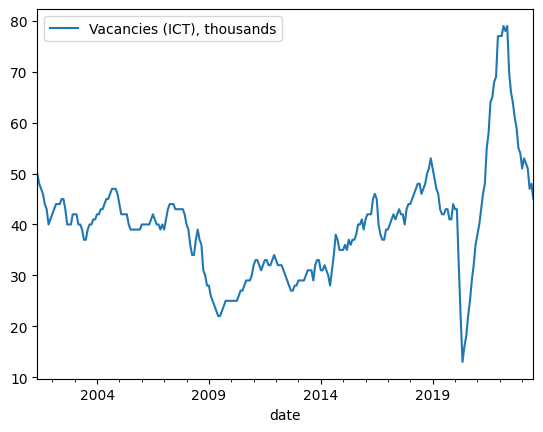

In [24]:
df.plot();